In [12]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import *
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
import filtering
%matplotlib widget

In [5]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/Photo/"
files = glob(pathToData+"*")
files

['/home/alan/Documents/LAB/CSHL/Data/Photo/2024_06_18_0028.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Photo/2024_06_18_0027.abf']

In [6]:
get_protocol(files)

['Opto_PPR', 'Opto_IV Curve']

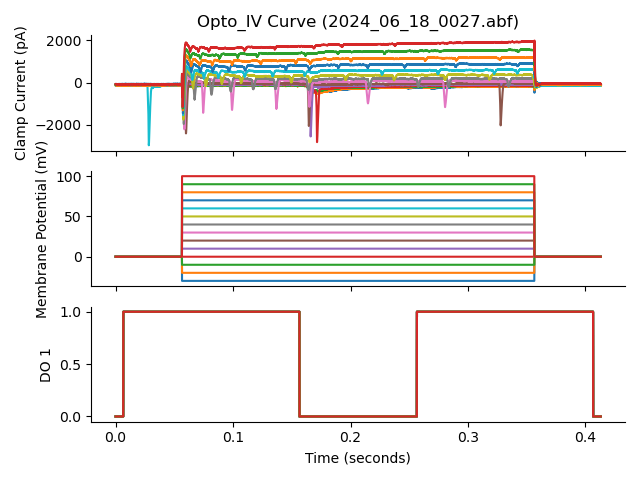

In [63]:
f = files[1]
plot_swps_DO(f,[1])

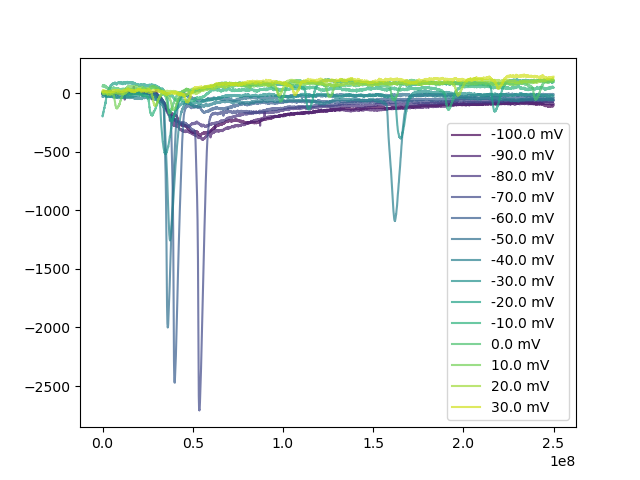

In [65]:
plt.close('all')
cmap = mp.colormaps['viridis']
f = files[1]
swps, swp_time, sr = get_sweeps(f)
## The your voltage :
start = 0.15
end = 0.25
base = np.mean(swp_window(swps,0.14,0.15,sr,channel=0),axis=1)
voltage = np.mean(swp_window(swps,start,end,sr,channel=1),axis=1) - 70
current = swp_window(swps,start,end,sr,channel=0)
# filt = np.array([filtering.lowpass(c,1/sr,) for c in current])
time = np.arange(len(current[0]))*sr
fig,ax = plt.subplots()
for i,c in enumerate(current):
    color = cmap(i/len(current))[:-1]
    ax.plot(time,c-base[i],label=f'{voltage[i]} mV',color=color,alpha=0.7)
ax.legend(loc="lower right")

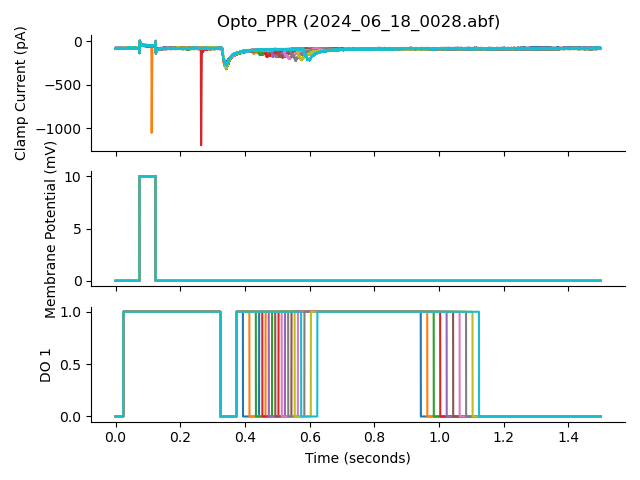

In [66]:
f = files[0]
plot_swps_DO(f,[1])

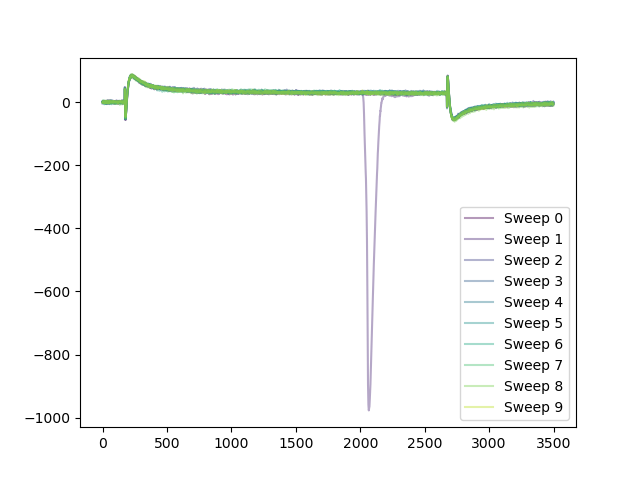

In [71]:
swps, swp_time, sr = get_sweeps(f)
seal_test = swp_window(swps,0.07,0.14,sr,channel=0)
cmap = mp.colormaps['viridis']
fig,ax = plt.subplots()
for i,test in enumerate(seal_test):
    color = cmap(i/len(seal_test))[:-1]
    ax.plot(test - np.mean(test[:10]),alpha=0.4,color=color,label = f'Sweep {i}')
ax.legend(loc="lower right")

In [ ]:
## Get the sweeps
swps, swp_time, sr = get_sweeps(f)
## define your voltage step window channel 1
## Current baseline
i_start = 0.31
i_end = 0.32
current_baseline = np.mean(swp_window(swps,v_start,v_end,sr,channel=0),axis=1)
## define your current step window channel 0
i_start = 0.31
i_end = 0.38
current_ref = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1) - current_baseline
## define your current response window channel 0
i_start = 0.31
i_end = 0.38
current_ref = np.min(swp_window(swps,i_start,i_end,sr,channel=0),axis=1) - current_baseline
## Create a figure with two subplots (ax[0] and ax[1])
## The sharex=True makes the two subplots share the same x axis. 
fig,ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(voltage_step,current_response,'.')
ax[0].set_ylabel('Current response (pA)')
ax[1].plot(voltage_step,current_response/current_response.min(),'.')
ax[1].set_ylabel('Normalise deactivaton')
ax[1].set_xlabel('Voltage Step (mV)')
plt.show()

### Activation

In [7]:
IV_files = files_from_protocol('IV',files)
IV_files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf']

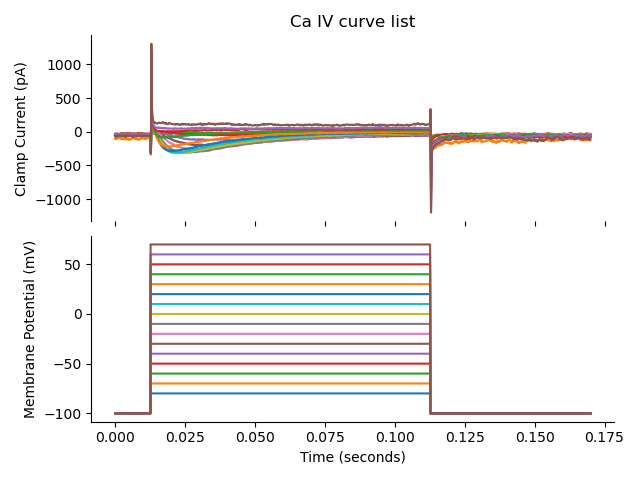

In [8]:
f = IV_files[0]
plot_swps(f)

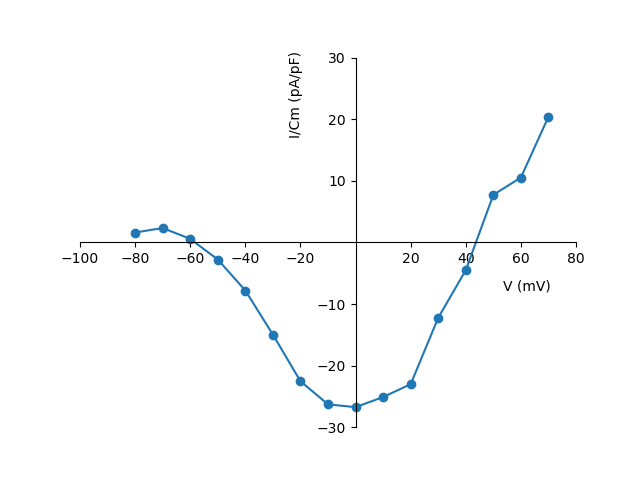

In [25]:
## Extract the sweeps
swps, swp_time, sr = get_sweeps(f)
## Enter the membrane capacitance you have noted
capacitance = 10 # pF
## The mean on your voltage step:
v_start = 0.014
v_end = 0.02
voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
## The mean on your voltage step:
v_start = 0.01
v_end = 0.012
current_baseline = np.mean(swp_window(swps,v_start,v_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.015
i_end = 0.04
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
current_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window])
## normalise over baseline
current_response -= current_baseline
## make it density current
current_response /= capacitance
## Create a figure plot with this line:
fig,ax = plt.subplots()
## the ax.plot(x,y,'line, dot,...') will plot your data to the figure
# image_path = '/home/alan/Documents/LAB/CSHL/Airplane.png'  # Path to your airplane image file
# airplane_image = plt.imread(image_path)
# ##
# # Create a custom marker using the airplane image
# def airplane_marker(ax, xdata, ydata, image):
#     for x, y in zip(xdata, ydata):
#         ab = AnnotationBbox(OffsetImage(image, zoom=0.25), (x, y), frameon=False)
#         ax.add_artist(ab)
    
ax.plot(voltage_step,current_response,'-o')
# airplane_marker(ax,voltage_step,current_response, airplane_image)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I/Cm (pA/pF)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_label_coords(0.9, 0.4) 
ax.yaxis.set_label_coords(0.45, 0.9)  # Move the y label to the center left
# Customize ticks to remove the 0 ticks and labels
xticks = [tick for tick in ax.get_xticks() if tick != 0]
yticks = [tick for tick in ax.get_yticks() if tick != 0]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()

### Inactivation

In [21]:
Inac_files = files_from_protocol('Inact',files)
Inac_files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf']

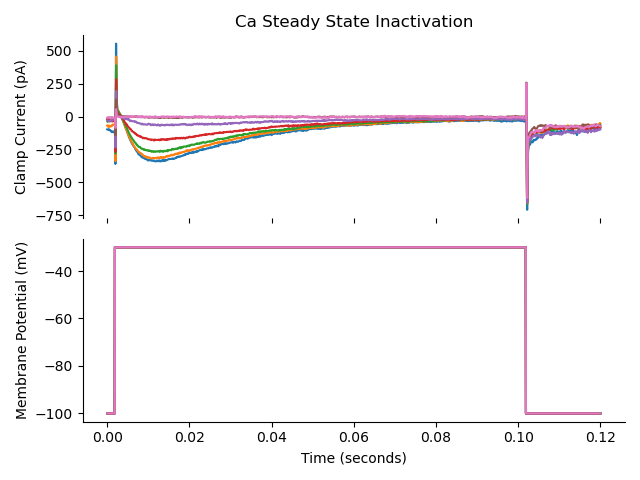

In [28]:
f = Inac_files[1]
plot_swps(f)